# Data cleaning and EDA
In this notebook, we will take a look at the metadata we had and see what we can extract from it. 

In [70]:
# imports 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [71]:
df = pd.read_csv('./dataset_metadata/melted_merged_allcolumns_v2.csv')
df.head()

C:\Users\masou\AppData\Local\Temp\ipykernel_10904\4013396511.py:1: DtypeWarning: Columns (4,7,11,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./dataset_metadata/melted_merged_allcolumns_v2.csv')


,country,iso,year,CPI,trade_balance_perc_of_gdp,life_expectancy,journos_imprisoned_yearly,inflation_annual_perc,gini_index,democracy_index,...,alcohol_consumption,unemployment_perc_tot_labor,pop_percent_with_sanitation,undernourishment_prevalence_perc,population,literacy,gdp_per_capita_2017dollar,fertility_rate,extreme_poverty,electricity_access
0,New Zealand,NZL,1995,95.5,1.87,76.8,84.3,1.43,32.6,NaN,...,NaN,6.46,NaN,NaN,3673899.0,NaN,29757.475,2.11,NaN,100.0
1,Denmark,DNK,1995,93.2,4.71,75.6,84.6,1.28,23.0,NaN,...,NaN,6.99,NaN,NaN,5235205.0,NaN,43015.676,1.81,0.0,100.0
2,Singapore,SGP,1995,92.6,16.8,77.1,51.4,3.18,44.3,NaN,...,NaN,3.30,NaN,NaN,3543878.0,NaN,48677.586,1.67,NaN,100.0
3,Finland,FIN,1995,91.2,7.46,76.9,82.9,4.2,23.5,NaN,...,NaN,17.00,NaN,NaN,5107942.0,NaN,31499.807,1.81,0.0,100.0
4,Canada,CAN,1995,88.7,3.13,78.1,79.6,2.25,31.4,NaN,...,NaN,9.49,NaN,NaN,29289430.0,NaN,NaN,1.64,NaN,100.0


## Talk about the dataset

This dataset is composed of 38 columns. The 'country', 'iso', and 'year' represent the name the country, the iso 3 code for the country, and the year related to the observations of that country. The iso 3 is a standard 3 letter way of naming countries that helps us identify countries since there is not a unique way of representing a county name and some countries tend to have multiple names or ways their name is represented, e.g., USA, US, United States, or United States of America.

more on this and the columns

In [72]:
df.shape

(74742, 38)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74742 entries, 0 to 74741
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           70316 non-null  object 
 1   iso                               74742 non-null  object 
 2   year                              74742 non-null  int64  
 3   CPI                               4068 non-null   float64
 4   trade_balance_perc_of_gdp         8730 non-null   object 
 5   life_expectancy                   56646 non-null  float64
 6   journos_imprisoned_yearly         7590 non-null   float64
 7   inflation_annual_perc             10047 non-null  object 
 8   gini_index                        49477 non-null  float64
 9   democracy_index                   2520 non-null   float64
 10  childmor_0_5_per_1000             57527 non-null  float64
 11  cellphone_per_100                 10246 non-null  object 
 12  avrg

As we can see there are 5 columns with mixed types (`trade_balance_perc_of_gdp`,  `inflation_annual_perc `, `cellphone_per_100`, `linguistic_div_index `, and `religious_div_index `). Let us take a closer look at these columns to see if we can figure out what it happening there.

In [65]:
print(df['trade_balance_perc_of_gdp'].apply(lambda x: type(x)).value_counts())

# We can use the following lines to to print the type of each row in a separate column
#df['type'] = df['trade_balance_perc_of_gdp'].apply(lambda x: type(x))
#df[df['type'] == str]

<class 'float'>    66012
<class 'str'>       8730
Name: trade_balance_perc_of_gdp, dtype: int64


As we can see, the types are float and string.

In [74]:
columns_type = ['trade_balance_perc_of_gdp', 'inflation_annual_perc' , 'cellphone_per_100', 'linguistic_div_index', 'religious_div_index']
for col in columns_type:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74742 entries, 0 to 74741
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           70316 non-null  object 
 1   iso                               74742 non-null  object 
 2   year                              74742 non-null  int64  
 3   CPI                               4068 non-null   float64
 4   trade_balance_perc_of_gdp         8728 non-null   float64
 5   life_expectancy                   56646 non-null  float64
 6   journos_imprisoned_yearly         7590 non-null   float64
 7   inflation_annual_perc             10039 non-null  float64
 8   gini_index                        49477 non-null  float64
 9   democracy_index                   2520 non-null   float64
 10  childmor_0_5_per_1000             57527 non-null  float64
 11  cellphone_per_100                 10245 non-null  float64
 12  avrg

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,74742.0,1.716904e+03,1.239511e+03,-10000.000000,1854.000000,1.946000e+03,2.011000e+03,2.100000e+03
CPI,4068.0,4.307675e+01,2.109506e+01,4.000000,27.000000,3.700000e+01,5.600000e+01,1.000000e+02
trade_balance_perc_of_gdp,8728.0,-5.478314e+00,1.710133e+01,-165.000000,-10.800000,-3.120000e+00,1.760000e+00,8.170000e+01
life_expectancy,56646.0,5.336310e+01,2.131952e+01,1.010000,32.900000,5.000000e+01,7.400000e+01,9.440000e+01
journos_imprisoned_yearly,7590.0,4.931615e+01,2.832070e+01,0.000000,26.625000,5.180000e+01,7.510000e+01,9.700000e+01
inflation_annual_perc,10039.0,2.235271e+01,1.818428e+02,-98.700000,1.960000,5.100000e+00,1.100000e+01,6.260000e+03
gini_index,49477.0,4.060074e+01,8.591881e+00,15.700000,35.000000,4.010000e+01,4.520000e+01,8.160000e+01
democracy_index,2520.0,5.499232e+01,2.204249e+01,8.600000,35.200000,5.810000e+01,7.250000e+01,9.930000e+01
childmor_0_5_per_1000,57527.0,2.090726e+02,1.854118e+02,0.250000,15.700000,1.790000e+02,4.030000e+02,7.560000e+02
cellphone_per_100,10245.0,3.636180e+01,5.171516e+01,0.000000,0.000000,1.040000e+00,7.510000e+01,4.210000e+02


As we can see, the year column has some values back dating to -10,000. This is because some of this data is in fact the extrapolation of the models one has fit. Since in this study, our focus will be primarily on the corruption perception index (CPI).

In [77]:
df['CPI'].isna().sum()

70674

Let us create a new dataframe that only contains records that have a value for CPI and do some further analysis on it. 

In [80]:
df_model = df[df['CPI'].notna()]

In [82]:
df_model.shape

(4068, 38)

We have 4068 records with CPI data. 

In [84]:
df_model.isna().sum().sort_values(ascending=False)

alcohol_consumption                 3313
literacy                            3203
poverty_ratio                       3089
extreme_poverty                     2530
democracy_index                     1614
undernourishment_prevalence_perc    1201
education_owid_index                1019
suicide_rate                         951
pop_percent_with_sanitation          764
press_freedom_index                  735
gender_inequality_ind                487
electricity_access                   449
religious_div_index                  402
linguistic_div_index                 402
ethnic_div_index                     382
trade_balance_perc_of_gdp            380
gdp_per_capita_2017dollar            362
journos_imprisoned_yearly            351
rule_of_low                          298
voice_and_accountability             298
regulatory_quality                   298
government_effectiveness             298
control_of_corruption                298
political_stability                  298
population      

In [86]:
df_model.corr().sort_values(by='CPI', ascending=False)

C:\Users\masou\AppData\Local\Temp\ipykernel_10904\1583223186.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_model.corr().sort_values(by='CPI', ascending=False)


,year,CPI,trade_balance_perc_of_gdp,life_expectancy,journos_imprisoned_yearly,inflation_annual_perc,gini_index,democracy_index,childmor_0_5_per_1000,cellphone_per_100,...,alcohol_consumption,unemployment_perc_tot_labor,pop_percent_with_sanitation,undernourishment_prevalence_perc,population,literacy,gdp_per_capita_2017dollar,fertility_rate,extreme_poverty,electricity_access
CPI,-0.060812,1.000000,0.315559,0.620018,0.577203,-0.184134,-0.292101,0.723110,-0.555427,0.360074,...,0.445494,-0.044775,0.556238,-0.510327,-0.067617,0.398153,0.762497,-0.530014,-0.411028,0.470028
control_of_corruption,-0.088606,0.971417,0.285771,0.612278,0.607682,-0.183829,-0.271108,0.735580,-0.552547,0.364016,...,0.466317,-0.021903,0.547830,-0.509646,-0.058003,0.386427,0.750085,-0.536112,-0.396433,0.465109
rule_of_low,-0.086454,0.933357,0.313105,0.646577,0.649424,-0.196438,-0.316785,0.773030,-0.586636,0.394219,...,0.508536,-0.041761,0.574156,-0.570981,-0.027131,0.428559,0.758269,-0.567894,-0.429816,0.498351
government_effectiveness,-0.106598,0.920845,0.361122,0.691583,0.621109,-0.195223,-0.309922,0.757047,-0.634160,0.429816,...,0.517586,-0.067275,0.651591,-0.624700,0.011333,0.527577,0.779604,-0.628354,-0.482064,0.577957
regulatory_quality,-0.105184,0.873851,0.321793,0.645729,0.685357,-0.216733,-0.265707,0.790907,-0.586711,0.434529,...,0.550259,-0.036173,0.590549,-0.575735,-0.038078,0.461773,0.746605,-0.580379,-0.483025,0.527365
avrg_daily_income,0.018467,0.776225,0.471232,0.654438,0.359117,-0.144380,-0.348110,0.494430,-0.550710,0.425361,...,0.325228,-0.149382,0.601109,-0.495350,-0.077679,0.413555,0.965877,-0.527300,-0.457091,0.507363
gdp_per_capita_2017dollar,0.014446,0.762497,0.536224,0.651077,0.335449,-0.137709,-0.356091,0.480876,-0.568935,0.447088,...,0.362715,-0.124279,0.618295,-0.508155,-0.084519,0.445229,1.000000,-0.542304,-0.458762,0.523791
voice_and_accountability,-0.092057,0.756358,0.089291,0.528235,0.917667,-0.180777,-0.174989,0.958616,-0.466746,0.306010,...,0.570323,0.030549,0.402237,-0.450630,-0.072923,0.299989,0.494557,-0.469694,-0.420960,0.393836
political_stability,-0.072706,0.739907,0.254833,0.474994,0.518886,-0.171366,-0.179570,0.607114,-0.501296,0.329611,...,0.485111,-0.041870,0.468906,-0.487740,-0.147074,0.418019,0.587868,-0.520187,-0.399359,0.413673
democracy_index,-0.017678,0.723110,0.067336,0.582913,0.892419,-0.144185,-0.165865,1.000000,-0.523265,0.411940,...,0.557926,0.036860,0.432362,-0.446421,-0.009461,0.336735,0.480876,-0.519974,-0.406191,0.434067


C:\Users\masou\AppData\Local\Temp\ipykernel_10904\2135850661.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_model.corr(), cmap= 'bone')


<Axes: >

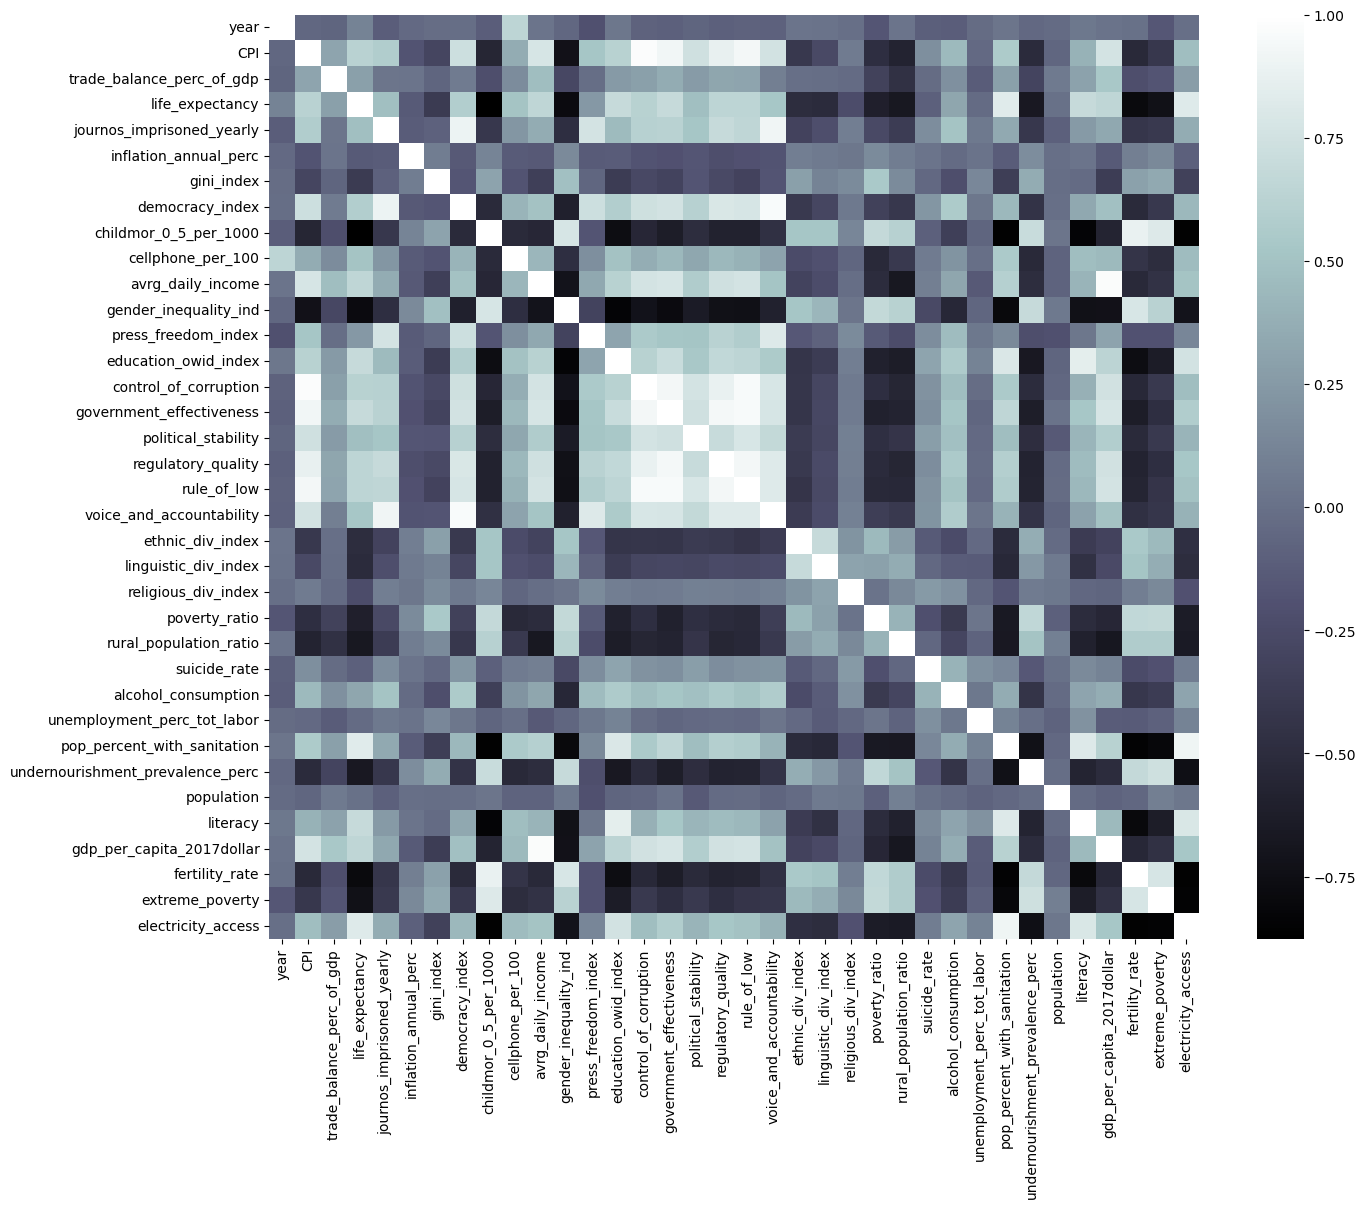

In [90]:
plt.figure(figsize=(15, 12))
sns.heatmap(df_model.corr(), cmap= 'bone')

There are some nice information about how control of corruption and other indicators are calculated. One idea would be to not use them as modeling parameters (since they could be correlated), or maybe select some of those not all of that.

Some interesting sources if information:
- about the control of corruption data and also general about corruption and why is it important: https://www.mcc.gov/who-we-select/indicator/control-of-corruption-indicator/#:~:text=The%20Control%20of%20Corruption%20indicator,Enterprise%20Performance%20Survey%2C%20the%20Bertelsmann
- control of corruption and it's definition: https://databank.worldbank.org/metadataglossary/worldwide-governance-indicators/series/CC.EST
- control of corruption calculation sources: https://www.worldbank.org/content/dam/sites/govindicators/doc/cc.pdf 
- information about worldwide governance indicators (the 6 ones from worlds bank): https://www.worldbank.org/en/publication/worldwide-governance-indicators
- 

- Drop repeating columns
- Find the correlation between columns